In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# importing os module for environment variables
import os
# importing necessary functions from dotenv library
from dotenv import load_dotenv, dotenv_values 
# loading variables from .env file
load_dotenv() 

True

In [68]:
#importing the resources our data from data file and the id mapping.
data = pd.read_csv(os.getenv("dataFile"))
IDs = pd.read_csv(os.getenv("encodingFile"))

In [69]:
#Handling the missing values by replacing '?' character to none to facilitate data usability.
#loop over columns each series and reset null values to none.
for (columnName, columnData) in data.items():
   print('Column Name : ', columnName)
   data.replace('?', None, inplace=True)
   print(data.isnull().sum())
# data.describe()

Column Name :  encounter_id
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride         

In [70]:
# dropping the columns with more than 90% null values
for (columnName, columnData) in data.items():
    if(data[columnName].isnull().sum()/data[columnName].count() >= 0.9 ):
        data.drop(columnName,axis=1, inplace = True)
print(data.head())

   encounter_id  patient_nbr             race  gender      age  \
0       2278392      8222157        Caucasian  Female   [0-10)   
1        149190     55629189        Caucasian  Female  [10-20)   
2         64410     86047875  AfricanAmerican  Female  [20-30)   
3        500364     82442376        Caucasian    Male  [30-40)   
4         16680     42519267        Caucasian    Male  [40-50)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code  ...  citoglipton  insulin  \
0                 1       None  ...           No       No   
1                 3       None  ...           No      

In [71]:
#description on each column and the number of its null values.
for (columnName, columnData) in data.items():
   print('Column Name : ', columnName)
   print('Missing values:', columnData.isnull().sum())

Column Name :  encounter_id
Missing values: 0
Column Name :  patient_nbr
Missing values: 0
Column Name :  race
Missing values: 2273
Column Name :  gender
Missing values: 0
Column Name :  age
Missing values: 0
Column Name :  admission_type_id
Missing values: 0
Column Name :  discharge_disposition_id
Missing values: 0
Column Name :  admission_source_id
Missing values: 0
Column Name :  time_in_hospital
Missing values: 0
Column Name :  payer_code
Missing values: 40256
Column Name :  num_lab_procedures
Missing values: 0
Column Name :  num_procedures
Missing values: 0
Column Name :  num_medications
Missing values: 0
Column Name :  number_outpatient
Missing values: 0
Column Name :  number_emergency
Missing values: 0
Column Name :  number_inpatient
Missing values: 0
Column Name :  diag_1
Missing values: 21
Column Name :  diag_2
Missing values: 358
Column Name :  diag_3
Missing values: 1423
Column Name :  number_diagnoses
Missing values: 0
Column Name :  metformin
Missing values: 0
Column Name 

In [72]:
##help(pd.get_dummies)
# data.describe()

In [73]:
#dictionaries will be set in our active data column's by it's decoded value from id_mapping file..
admission_type_map = {
    1: "Emergency", 2: "Urgent", 3: "Elective", 4: "Newborn",
    5: "Not Available", 6: "NULL", 7: "Trauma Center", 8: "Not Mapped"
}

discharge_disposition_map = {
    1: "Discharged to home",
    2: "Discharged/transferred to another short term hospital",
    3: "Discharged/transferred to SNF",
    4: "Discharged/transferred to ICF",
    5: "Discharged/transferred to another type of inpatient care institution",
    6: "Discharged/transferred to home with home health service",
    7: "Left AMA",
    8: "Discharged/transferred to home under care of Home IV provider",
    9: "Admitted as an inpatient to this hospital",
    10: "Neonate discharged to another hospital for neonatal aftercare",
    11: "Expired",
    12: "Still patient or expected to return for outpatient services",
    13: "Hospice / home",
    14: "Hospice / medical facility",
    15: "Discharged/transferred within this institution to Medicare approved swing bed",
    16: "Discharged/transferred/referred another institution for outpatient services",
    17: "Discharged/transferred/referred to this institution for outpatient services",
    18: "NULL",
    19: "Expired at home. Medicaid only, hospice.",
    20: "Expired in a medical facility. Medicaid only, hospice.",
    21: "Expired, place unknown. Medicaid only, hospice.",
    22: "Discharged/transferred to another rehab facility including rehab units of a hospital",
    23: "Discharged/transferred to a long term care hospital",
    24: "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare",
    25: "Not Mapped",
    26: "Unknown/Invalid",
    27: "Discharged/transferred to a federal health care facility",
    28: "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
    29: "Discharged/transferred to a Critical Access Hospital (CAH)",
    30: "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere"
}

admission_source_map = {
    1: "Physician Referral",
    2: "Clinic Referral",
    3: "HMO Referral",
    4: "Transfer from a hospital",
    5: "Transfer from a Skilled Nursing Facility (SNF)",
    6: "Transfer from another health care facility",
    7: "Emergency Room",
    8: "Court/Law Enforcement",
    9: "Not Available",
    10: "Transfer from critical access hospital",
    11: "Normal Delivery",
    12: "Premature Delivery",
    13: "Sick Baby",
    14: "Extramural Birth",
    15: "Not Available",
    17: "NULL",
    18: "Transfer From Another Home Health Agency",
    19: "Readmission to Same Home Health Agency",
    20: "Not Mapped",
    21: "Unknown/Invalid",
    22: "Transfer from hospital inpt/same fac reslt in a sep claim",
    23: "Born inside this hospital",
    24: "Born outside this hospital",
    25: "Transfer from Ambulatory Surgery Center",
    26: "Transfer from Hospice"
}

In [74]:
#Mapping of the dictionaries into the main dataframe..
data['admission_type_desc'] = data['admission_type_id'].map(admission_type_map)
data['discharge_desc'] = data['discharge_disposition_id'].map(discharge_disposition_map)
data['admission_source_desc'] = data['admission_source_id'].map(admission_source_map)

#encoding each column into a numberical value
data=pd.get_dummies(data,columns=['admission_type_desc'])
data=pd.get_dummies(data,columns=['discharge_desc'])
data=pd.get_dummies(data,columns=['admission_source_desc'])

#dropping the columns that have been mapped..
data.drop('admission_type_id',axis = 1, inplace = True)
data.drop('discharge_disposition_id',axis = 1, inplace = True)
data.drop('admission_source_id',axis = 1, inplace = True)

print(data.head())
# data.describe()

   encounter_id  patient_nbr             race  gender      age  \
0       2278392      8222157        Caucasian  Female   [0-10)   
1        149190     55629189        Caucasian  Female  [10-20)   
2         64410     86047875  AfricanAmerican  Female  [20-30)   
3        500364     82442376        Caucasian    Male  [30-40)   
4         16680     42519267        Caucasian    Male  [40-50)   

   time_in_hospital payer_code  num_lab_procedures  num_procedures  \
0                 1       None                  41               0   
1                 3       None                  59               0   
2                 2       None                  11               5   
3                 2       None                  44               1   
4                 1       None                  51               0   

   num_medications  ...  admission_source_desc_Not Available  \
0                1  ...                                False   
1               18  ...                               

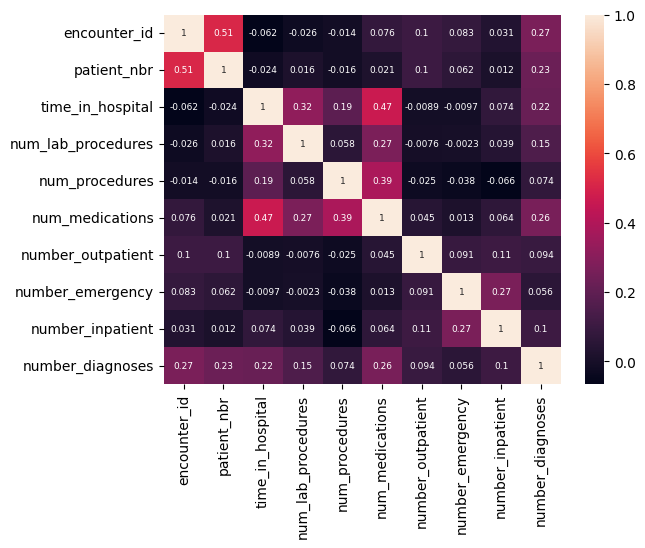

In [75]:
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(),annot=True, annot_kws={'size': 6.5})
plt.show()

In [76]:
# Function to extract midpoint from range string
def extract_midpoint(range_str):
    try:
        # Extract the numbers from strings like '[0-10]'
        range_str = range_str.strip('[]()')  # Remove brackets
        lower, upper = map(int, range_str.split('-'))  # Split by hyphen and convert to integers
        return (lower + upper) / 2  # Return the midpoint
    except:
        return None  # Return None if conversion fails

# Apply the function to the 'age' column
# print("Original 'age' column (first few values):")
# print(data['age'].head())

# Convert age ranges to midpoints
data['age_numeric'] = data['age'].apply(extract_midpoint)

print("\nConverted 'age_numeric' column (first few values):")
print(data['age_numeric'].head())

#################################
# If you want to replace the original column instead of creating a new one:
# data['age'] = data['age'].apply(extract_midpoint)
#################################

# Check if there were any values that couldn't be converted
null_count = data['age_numeric'].isna().sum()
print(f"\nNumber of values that couldn't be converted: {null_count}")

# If there are any null values, you might want to investigate
if null_count > 0:
    print("\nSample of problematic values:")
    problematic = data[data['age_numeric'].isnull()]['age'].unique()
    print(problematic[:5])  # Print up to 5 unique problematic values


# Ensure the 'age' column is not dropped before applying the extract_midpoint function
# Drop the 'age' column only after creating 'age_numeric'
data.drop('age', axis=1, inplace=True)
# data.describe()


Converted 'age_numeric' column (first few values):
0     5.0
1    15.0
2    25.0
3    35.0
4    45.0
Name: age_numeric, dtype: float64

Number of values that couldn't be converted: 0


In [77]:
data.describe()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age_numeric
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,65.967022
std,1.026403e+08,3.869636e+07,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,15.940838
min,1.252200e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000
25%,8.496119e+07,2.341322e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,55.000000
50%,1.523890e+08,4.550514e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,65.000000
75%,2.302709e+08,8.754595e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,75.000000
max,4.438672e+08,1.895026e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,95.000000


In [78]:

# First, examine which columns are being detected as 'object' type
object_cols = data.select_dtypes(include=['object']).columns
print(f"Columns detected as 'object' type: {list(object_cols)}")

# Check each object column to see if it contains numeric values stored as strings
for col in object_cols:
    print(f"\nColumn '{col}' sample values:")
    print(data[col].head())
    
    # Try to convert to numeric and see if it works
    numeric_conversion = pd.to_numeric(data[col], errors='coerce')
    conversion_success_rate = 1 - (numeric_conversion.isna().sum() / len(data))
    print(f"Successfully converts to numeric: {conversion_success_rate:.1%}")
    
    if conversion_success_rate > 0.9:  # If over 90% converts successfully
        print(f"⚠️ Column '{col}' appears to contain numeric data stored as strings!")
        # Convert the column to numeric
        data[col] = numeric_conversion
        print(f"✓ Converted '{col}' to numeric type")

# After conversion, re-detect categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"\nCategorical columns after conversion: {list(categorical_cols)}")

Columns detected as 'object' type: ['race', 'gender', 'payer_code', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

Column 'race' sample values:
0          Caucasian
1          Caucasian
2    AfricanAmerican
3          Caucasian
4          Caucasian
Name: race, dtype: object
Successfully converts to numeric: 0.0%

Column 'gender' sample values:
0    Female
1    Female
2    Female
3      Male
4      Male
Name: gender, dtype: object
Successfully converts to numeric: 0.0%

Column 'payer_code' sample values:
0    None
1    None
2    None
3    None
4    None
Name: payer_code, dtype: object
S

In [79]:
data.describe()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,age_numeric
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,100100.00000,98872.000000,95285.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,493.58307,438.674883,418.179285,7.422607,65.967022
std,1.026403e+08,3.869636e+07,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,206.71532,178.901638,177.323979,1.933600,15.940838
min,1.252200e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.00000,5.000000,3.000000,1.000000,5.000000
25%,8.496119e+07,2.341322e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,410.00000,276.000000,272.000000,6.000000,55.000000
50%,1.523890e+08,4.550514e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,440.00000,425.000000,403.000000,8.000000,65.000000
75%,2.302709e+08,8.754595e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,599.00000,530.000000,496.000000,9.000000,75.000000
max,4.438672e+08,1.895026e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,999.00000,999.000000,999.000000,16.000000,95.000000


In [80]:
# Now proceed with your original one-hot encoding and correlation analysis
for columnName in categorical_cols:
    data = pd.get_dummies(data, columns=[columnName])

corr_matrix = data.corr()

# Original low correlation filtering
# low_corr_columns = [col for col in corr_matrix.columns if (corr_matrix[col].abs().max() < 0.5)]
# data.drop(columns=low_corr_columns, inplace=True)

low_corr_columns = []
for col in corr_matrix.columns:
    # Get correlations excluding self (which is always 1.0)
    max_corr = corr_matrix[col].drop(col).abs().max()
    if max_corr < 0.3:
        low_corr_columns.append(col)

print(f"Found {len(low_corr_columns)} columns with max correlation < 0.3")
data.drop(columns=low_corr_columns, inplace=True)
print(f"Dataframe shape after dropping: {data.shape}")

# print(f"\nRemoved {len(low_corr_columns)} columns with low correlation")
# print(f"Final dataframe shape: {data.shape}")

print(data.head())
# Now re-detect categorical columns after type conversion
# for (columnName, columnData) in data.items():
#     data=pd.get_dummies(data,columns=[columnName])

# print(data.head())
# corr_matrix=data.corr()

# low_corr_columns = [col for col in corr_matrix.columns if (corr_matrix[col].abs().max() < 0.2)]

# data.drop(columns=low_corr_columns, inplace=True)



Found 90 columns with max correlation < 0.3
Dataframe shape after dropping: (101766, 78)
   encounter_id  patient_nbr  time_in_hospital  num_lab_procedures  \
0       2278392      8222157                 1                  41   
1        149190     55629189                 3                  59   
2         64410     86047875                 2                  11   
3        500364     82442376                 2                  44   
4         16680     42519267                 1                  51   

   num_procedures  num_medications  admission_type_desc_Elective  \
0               0                1                         False   
1               0               18                         False   
2               5               13                         False   
3               1               16                         False   
4               0                8                         False   

   admission_type_desc_Emergency  admission_type_desc_NULL  \
0                  

In [81]:
data.describe()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,age_numeric
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,4.395987,43.095641,1.339730,16.021844,65.967022
std,1.026403e+08,3.869636e+07,2.985108,19.674362,1.705807,8.127566,15.940838
min,1.252200e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,5.000000
25%,8.496119e+07,2.341322e+07,2.000000,31.000000,0.000000,10.000000,55.000000
50%,1.523890e+08,4.550514e+07,4.000000,44.000000,1.000000,15.000000,65.000000
75%,2.302709e+08,8.754595e+07,6.000000,57.000000,2.000000,20.000000,75.000000
max,4.438672e+08,1.895026e+08,14.000000,132.000000,6.000000,81.000000,95.000000


In [82]:
# for (columnName, columnData) in data.items():
#     print('Column Name : ', columnName)
#     if np.issubdtype(columnData.dtype, np.number):
#         Q1 = data[columnName].quantile(0.25)
#         Q3 = data[columnName].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         outliers = data[(data[columnName] > upper_bound) | (data[columnName] < lower_bound)]
#         print(columnName)
#         print(outliers[columnName].count()) 
#         data[columnName].clip(lower = lower_bound,upper=upper_bound)
#         outliers = data[(data[columnName] > upper_bound) | (data[columnName] < lower_bound)]
#         print(outliers[columnName].count()) 
# data.describe()

In [83]:
data.describe()
data.shape

(101766, 78)

In [84]:
print(data.shape)
mask = pd.Series(True ,index = data.index)
for (columnName, columnData) in data.items():
    print('Column Name : ', columnName)
    if np.issubdtype(columnData.dtype, np.number):
        Q1 = data[columnName].quantile(0.25)
        Q3 = data[columnName].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        in_bounds = columnData.between(lower_bound,upper_bound)
        mask &= in_bounds
data = data[mask]
data = data.dropna()
print(data.shape)

##outliers = data[(data[columnName] > upper_bound) | (data[columnName] < lower_bound)]
        
##    print(columnName)
##      print(outliers[columnName].count()) 
##data[columnName].clip(lower = lower_bound,upper=upper_bound)
## outliers = data[(data[columnName] > upper_bound) | (data[columnName] < lower_bound)]
# ##print(outliers[columnName].count()) 

(101766, 78)
Column Name :  encounter_id
Column Name :  patient_nbr
Column Name :  time_in_hospital
Column Name :  num_lab_procedures
Column Name :  num_procedures
Column Name :  num_medications
Column Name :  admission_type_desc_Elective
Column Name :  admission_type_desc_Emergency
Column Name :  admission_type_desc_NULL
Column Name :  admission_type_desc_Not Available
Column Name :  admission_type_desc_Urgent
Column Name :  discharge_desc_Discharged to home
Column Name :  discharge_desc_Discharged/transferred to SNF
Column Name :  discharge_desc_Discharged/transferred to home with home health service
Column Name :  discharge_desc_Not Mapped
Column Name :  admission_source_desc_Emergency Room
Column Name :  admission_source_desc_NULL
Column Name :  admission_source_desc_Physician Referral
Column Name :  age_numeric
Column Name :  race_AfricanAmerican
Column Name :  race_Caucasian
Column Name :  gender_Female
Column Name :  gender_Male
Column Name :  payer_code_MC
Column Name :  metfor

In [85]:
print(data)

        encounter_id  patient_nbr  time_in_hospital  num_lab_procedures  \
2              64410     86047875                 2                  11   
3             500364     82442376                 2                  44   
4              16680     42519267                 1                  51   
6              55842     84259809                 4                  70   
7              63768    114882984                 5                  73   
...              ...          ...               ...                 ...   
101761     443847548    100162476                 3                  51   
101762     443847782     74694222                 5                  33   
101763     443854148     41088789                 1                  53   
101764     443857166     31693671                10                  45   
101765     443867222    175429310                 6                  13   

        num_procedures  num_medications  admission_type_desc_Elective  \
2                    5    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prepare features and labels
X = data.drop(['readmitted_<30', 'readmitted_>30', 'readmitted_NO', 'patient_nbr', 'encounter_id'], axis=1)
Y = data['readmitted_<30']

# Split the dataset (use stratify if highly imbalanced)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Apply SMOTE to training data
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [i for i in range(9)],
    'class_weight': ['balanced']
}

# Initialize and search
rf = RandomForestClassifier(random_state=42)
#rf = RandomForestClassifier(random_state=42, n_estimators=400, max_depth=4, class_weight='balanced')

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=13, cv=3, scoring='recall', n_jobs=-1, random_state=42, verbose=1)

random_search.fit(x_train_res, y_train_res)

#print(f'Best parameters found: {random_search.best_params_}')

# Evaluate
#best_rf = random_search.best_estimator_
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)

print(f'Accuracy = {accuracy_score(y_test, y_pred) * 100:.2f}%')
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Feature importances
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(10))

# Tree visualization
plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[0], feature_names=X.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)
plt.title("One Tree from the Best Random Forest")
plt.show()


Fitting 3 folds for each of 13 candidates, totalling 39 fits


In [ ]:
# KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

# Separate features (all columns except last) and target (last column) from the dataset
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split data into training and testing sets with 60% training and 40% testing, fixed random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=30)

# Initialize StandardScaler to normalize features
scale = StandardScaler()

# Fit scaler on training data and transform both training and testing data to scale features
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

# Define hyperparameter grid to search for the best number of neighbors and distance metric
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 13, 15],  
    'weights': ['distance'],               
    'metric': ['euclidean']                 
}

# Initialize K-Nearest Neighbors classifier (default parameters)
knn = KNeighborsClassifier()

# Perform grid search with 5-fold cross-validation, optimizing for accuracy score
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

# Retrieve the best KNN model found by grid search
best_knn = grid_search.best_estimator_

# Use the best model to predict target values for the scaled test set
y_predict = best_knn.predict(x_test_scaled)

print("Best params: ", grid_search.best_params_)
print("Best cv score: ", grid_search.best_score_)
print("Accuracy: ", best_knn.score(x_test_scaled, y_test))
print("\nConfusion matrix :\n", confusion_matrix(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))


Best params:  {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
Best cv score:  0.9457507569639253
Accuracy:  0.9524338380691822

Confusion matrix :
 [[15884  1334]
 [  422 19277]]

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.92      0.95     17218
        True       0.94      0.98      0.96     19699

    accuracy                           0.95     36917
   macro avg       0.95      0.95      0.95     36917
weighted avg       0.95      0.95      0.95     36917



In [ ]:
# # removing people came more than one time..
# data_unique = data.drop_duplicates(subset=['patient_nbr'], keep='first')
# print(data_unique.value_counts)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Prepare features and target
X = data.drop(['readmitted_<30', 'readmitted_>30', 'readmitted_NO', 'patient_nbr', 'encounter_id'], axis=1)
Y = data['readmitted_<30']

# 2. Split data into train and test sets (stratified)
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# 3. Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 4. Apply SMOTE only on thebest_knn training set (scaled)
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_resample(x_train_scaled, y_train)

# 5. Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 6. Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 9],        
    'n_estimators': [150, 200],       
    'learning_rate': [0.01, 0.1, 0.5],
    'subsample': [0.7, 1],            
    'colsample_bytree': [0.7, 1]     
}

# 7. Setup GridSearchCV with 3-fold CV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1',
    n_jobs=-1,
    cv=3,
    verbose=2,
    refit=True
)

# 8. Fit model on SMOTE training data
grid_search.fit(x_train_smote, y_train_smote)

# 9. Predict on scaled test data
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(x_test_scaled)
y_prob = best_xgb.predict_proba(x_test_scaled)[:, 1]

# 10. Calculate metrics
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Best parameters: {grid_search.best_params_}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Fitting 3 folds for each of 96 candidates, totalling 288 fits


C:\Users\belal\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [11:33:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
Confusion Matrix:
 [[16383     0]
 [ 2075     1]]
Classification Report:
               precision    recall  f1-score   support

       False       0.89      1.00      0.94     16383
        True       1.00      0.00      0.00      2076

    accuracy                           0.89     18459
   macro avg       0.94      0.50      0.47     18459
weighted avg       0.90      0.89      0.83     18459

Accuracy: 0.8876
ROC AUC: 0.5896


In [ ]:
# # Logistic Regression with SMOTE applied before train-test split
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
# import numpy as np

# X = data.drop(['readmitted_<30', 'readmitted_>30', 'readmitted_NO', 'patient_nbr', 'encounter_id'], axis=1)
# Y = data['readmitted_<30']

# sm = SMOTE(random_state=42)
# X_smote, Y_smote = sm.fit_resample(X, Y)

# x_train, x_test, y_train, y_test = train_test_split(
#     X_smote, Y_smote, test_size=0.2, random_state=42, stratify=Y_smote
# )

# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform training data
# x_test_scaled = scaler.transform(x_test)        # Transform test data (using same scaler)

# model = LogisticRegression(
#     random_state=42,
#     solver='saga',
#     max_iter=200,
#     class_weight='balanced'
# )

# param_dist = {
#     'C': np.logspace(-2, 1, 10),
#     'penalty': ['l1', 'l2']
# }

# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_dist,
#     n_iter=8,
#     scoring='f1',
#     n_jobs=-1,
#     cv=2,
#     verbose=2,
#     random_state=42,
#     refit=True
# )

# random_search.fit(x_train_scaled, y_train)

# best_model = random_search.best_estimator_
# y_pred = best_model.predict(x_test_scaled)
# y_prob = best_model.predict_proba(x_test_scaled)[:, 1]

# print(f"Best hyperparameters: {random_search.best_params_}")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# roc_auc = roc_auc_score(y_test, y_prob)
# print(f"ROC AUC: {roc_auc:.4f}")


In [ ]:
#Logistic smote on training data.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np

# Step 1: Define features (X) and target (Y)
# Dropping unused target variants and identifiers
X = data.drop(['readmitted_<30', 'readmitted_>30', 'readmitted_NO', 'patient_nbr', 'encounter_id'], axis=1)
Y = data['readmitted_<30']

# Step 2: Split the dataset into training and testing sets (80/20)
# Stratify ensures class proportions are preserved in both sets
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# Step 3: Apply SMOTE to balance class distribution in training data
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

# Step 4: Standardize features (important for logistic regression convergence)
scaler = StandardScaler()
x_train_smote_scaled = scaler.fit_transform(x_train_smote)  # Fit and transform training data
x_test_scaled = scaler.transform(x_test)                    # Transform test data (using same scaler)

# Step 5: Initialize logistic regression model
model = LogisticRegression(
    random_state=42,
    solver='saga',
    max_iter=200,
    class_weight='balanced'
)

# Step 6: Define hyperparameter search space for RandomizedSearchCV
param_dist = {
    'C': np.logspace(-2, 1, 10),   
    'penalty': ['l1', 'l2']       
}

# Step 7: Set up RandomizedSearchCV to tune hyperparameters using cross-validation
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,                    
    scoring='f1',                 
    n_jobs=-1,                    
    cv=3,                         
    verbose=2,                    
    random_state=42,
    refit=True                    
)

# Step 8: Train model using SMOTE-resampled and scaled training data
random_search.fit(x_train_smote_scaled, y_train_smote)

# Step 9: Predict on the scaled original test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)
y_prob = best_model.predict_proba(x_test_scaled)[:, 1]

# Step 10: Evaluate performance
print(f"Best hyperparameters: {random_search.best_params_}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters: {'penalty': 'l2', 'C': np.float64(4.6415888336127775)}
Confusion Matrix:
 [[16382     1]
 [ 2076     0]]
Classification Report:
               precision    recall  f1-score   support

       False       0.89      1.00      0.94     16383
        True       0.00      0.00      0.00      2076

    accuracy                           0.89     18459
   macro avg       0.44      0.50      0.47     18459
weighted avg       0.79      0.89      0.83     18459

Accuracy: 0.8875
ROC AUC: 0.5896


c:\Users\belal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
# from imblearn.over_sampling import SMOTE
# import numpy as np

# # 1. Split train/test with stratification
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# # 2. Apply SMOTE to training data only
# sm = SMOTE(random_state=42)
# x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

# # 3. Initialize XGBoost classifier
# xgb_clf = xgb.XGBClassifier(
#     use_label_encoder=False,
#     eval_metric='logloss',
#     random_state=42,
# )

# # 4. Define hyperparameter grid
# param_grid = {
#     'max_depth': [3, 5, 7, 10, 15],      
#     'n_estimators': [50, 100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1, 0.15],  
#     'subsample': [0.5, 0.7, 1],
#     'colsample_bytree': [0.5, 0.7, 1]
# }

# # 5. Setup RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=xgb_clf,
#     param_distributions=param_grid,
#     n_iter=50,
#     scoring='f1',
#     n_jobs=-1,
#     cv=3,
#     verbose=2,
#     random_state=42,
#     refit=True
# )

# # 6. Fit model on SMOTE-resampled training data
# random_search.fit(x_train_smote, y_train_smote)

# # 7. Evaluate on test data with threshold tuning
# best_xgb = random_search.best_estimator_
# y_proba = best_xgb.predict_proba(x_test)[:, 1]

# # Find best threshold for F1 score
# best_threshold = 0.5
# best_f1 = 0
# for thresh in np.arange(0.01, 1.0, 0.01):
#     y_pred_thresh = (y_proba >= thresh).astype(int)
#     f1 = f1_score(y_test, y_pred_thresh)
#     if f1 > best_f1:
#         best_f1 = f1
#         best_threshold = thresh

# # Predict using the best threshold
# y_pred_best = (y_proba >= best_threshold).astype(int)

# # 8. Print results
# print(f"Best parameters: {random_search.best_params_}")
# print(f"Best threshold by F1 score: {best_threshold:.2f} with F1: {best_f1:.4f}\n")
# print("Confusion Matrix at best threshold:\n", confusion_matrix(y_test, y_pred_best))
# print("Classification Report at best threshold:\n", classification_report(y_test, y_pred_best))
# print(f"Accuracy at best threshold: {accuracy_score(y_test, y_pred_best):.4f}")


In [ ]:
# # SVM model 
# from sklearn import svm
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score

# x = data.iloc[:, :-1]
# y = data.iloc[:, -1]

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=30)

# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test) 
# clf = svm.SVC(kernel='linear')
# clf.fit(x_train_scaled, y_train)
# scores = cross_val_score(clf, x_train_scaled, y_train, cv=5)
# y_predict = clf.predict(x_test_scaled)
# print(classification_report(y_test, y_predict))
# print(f"CV score:", scores.mean())
# accuracy = accuracy_score(y_test, y_predict)
# print(f"Accuracy: {accuracy}")

# for i in range(10):
#     print(f"True: {y_test.iloc[i]}, Predicted: {y_predict[i]}")

In [ ]:
# #Random Forest Model (Still needs further development)

# from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# from sklearn.metrics import classification_report, roc_auc_score
# from sklearn.model_selection import train_test_split

# # Define features (X) and target (y)
# X = data.drop(['encounter_id', 'patient_nbr', 'readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
# y = data['readmitted_<30']

# # Train-test split (stratified)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# # Initialize and train Random Forest
# rf = RandomForestClassifier(
#     n_estimators=400,
#     class_weight='balanced',  # Handles imbalance
#     max_depth=6,            # Prevents overfitting
#     random_state=42
# )
# rf.fit(X_train, y_train)

# # Evaluate
# y_pred = rf.predict(X_test)
# print(classification_report(y_test, y_pred))
# print(f"AUC-ROC: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]):.2f}")

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

X = data.drop(['encounter_id', 'patient_nbr', 'readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
y = data['readmitted_<30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8849341784495368
              precision    recall  f1-score   support

       False       0.88      1.00      0.94     16335
        True       0.00      0.00      0.00      2124

    accuracy                           0.88     18459
   macro avg       0.44      0.50      0.47     18459
weighted avg       0.78      0.88      0.83     18459



c:\Users\belal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\belal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\belal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.p

              precision    recall  f1-score   support

       False       0.91      0.48      0.63     16374
        True       0.14      0.63      0.22      2085

    accuracy                           0.50     18459
   macro avg       0.52      0.56      0.43     18459
weighted avg       0.82      0.50      0.59     18459


Top Feature Importances:
                                              Feature  Importance
1                                  num_lab_procedures    0.155987
3                                     num_medications    0.143646
9                   discharge_desc_Discharged to home    0.136958
0                                    time_in_hospital    0.091209
16                                        age_numeric    0.057529
2                                      num_procedures    0.054118
22                                       metformin_No    0.029854
56                                         insulin_No    0.024933
4                        admission_type_desc_Elective

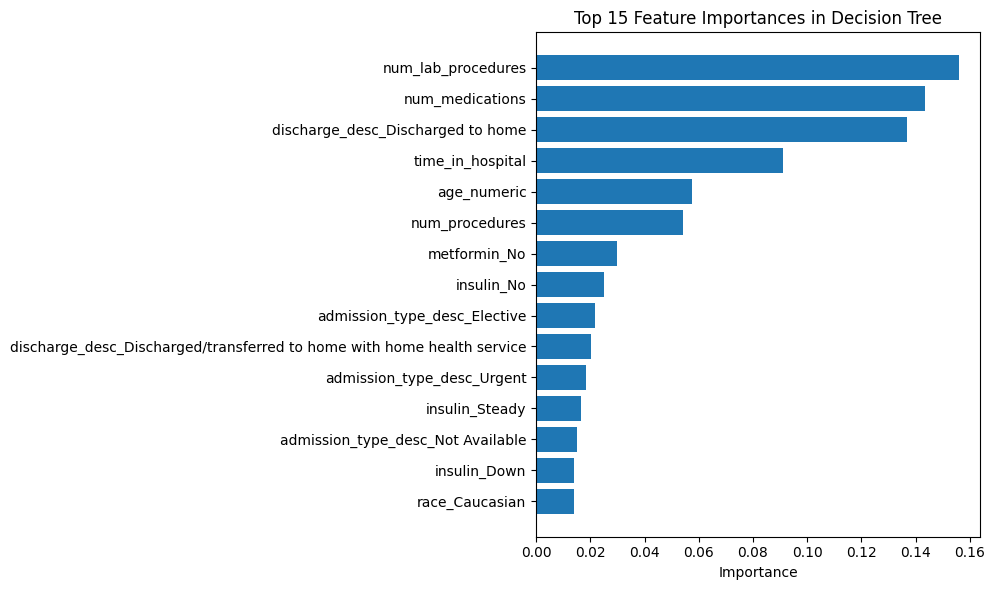

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

X = data.drop(['encounter_id', 'patient_nbr', 'readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
y = data['readmitted_<30']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=9, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop Feature Importances:")
print(feature_importance_df.head(10))

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:15][::-1], feature_importance_df['Importance'][:15][::-1])
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances in Decision Tree")
plt.tight_layout()
plt.show()

# import numpy as np
# import pandas as pd
# from sklearn.metrics import classification_report, recall_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.tree import DecisionTreeClassifier

# X = data.drop(['encounter_id', 'patient_nbr', 'readmitted_<30', 'readmitted_>30', 'readmitted_NO'], axis=1)
# y = data['readmitted_<30']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# param_grid = {
#     'max_depth': list(range(3, 20))
#     #'max_depth': list(range(41, 61))
# }

# clf = DecisionTreeClassifier(criterion='gini', random_state=42, class_weight='balanced')

# grid_search = GridSearchCV(
#     estimator=clf,
#     param_grid=param_grid,
#     scoring='recall',
#     cv=4,
#     n_jobs=-1
# )

# grid_search.fit(X_train, y_train)

# best_clf = grid_search.best_estimator_
# print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
# print(f"Best recall (CV average): {grid_search.best_score_:.4f}")

# y_pred = best_clf.predict(X_test)
# print("\nTest Set Evaluation:")
# print(classification_report(y_test, y_pred))


In [ ]:
# Input code for the top 15 most important features
top_15_features = feature_importance_df['Feature'].iloc[:15].tolist()
sample = data.iloc[0, :].copy()

for feature in top_15_features:
    current_value = sample[feature]
    if isinstance(current_value, (bool, np.bool_)):
        val = bool(int(input(f"{feature} (1 for True, 0 for False) [current: {current_value}]: ")))
    elif isinstance(current_value, (int, np.integer)):
        val = int(input(f"{feature} (integer) [current: {current_value}]: "))
    elif isinstance(current_value, (float, np.floating)):
        val = float(input(f"{feature} (float) [current: {current_value}]: "))
    else:
        val = input(f"{feature} (string) [current: {current_value}]: ")
    sample[feature] = val

print("\nUpdated sample with top 15 features:")
print(sample[top_15_features])

# Only use the columns the model was trained on
X_columns = X.columns if 'X' in locals() else [col for col in data.columns if col not in ['encounter_id', 'patient_nbr', 'readmitted_<30', 'readmitted_>30', 'readmitted_NO']]
print(clf.predict(sample[X_columns].to_frame().T)) #random forest
print(best_model.predict(sample[X_columns].to_frame().T)) #logistic regression
print(best_xgb.predict(sample[X_columns].to_frame().T)) #xgboost
print(best_knn.predict(sample[X_columns].to_frame().T)) #knn

AttributeError: 'bool' object has no attribute 'to_frame'